In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import glob

In [86]:
def gaussFit(x, a, x0, sigma):
    gauss = a*np.exp(-(x-x0)**2/(2*sigma**2)) +10
    return gauss


Gp3_data_E1/co60\Co60_30_1_805v.csv
[140, 6800, 175]
[ 112.40377876 6836.32630828  185.10991097]
Centre: 6836.326308283701 +/- 2.1579133290675183
[140, 7800, 250]
[ 110.         7759.86673573  143.11871102]
Centre: 7759.866735734249 +/- 2.4379652268922998


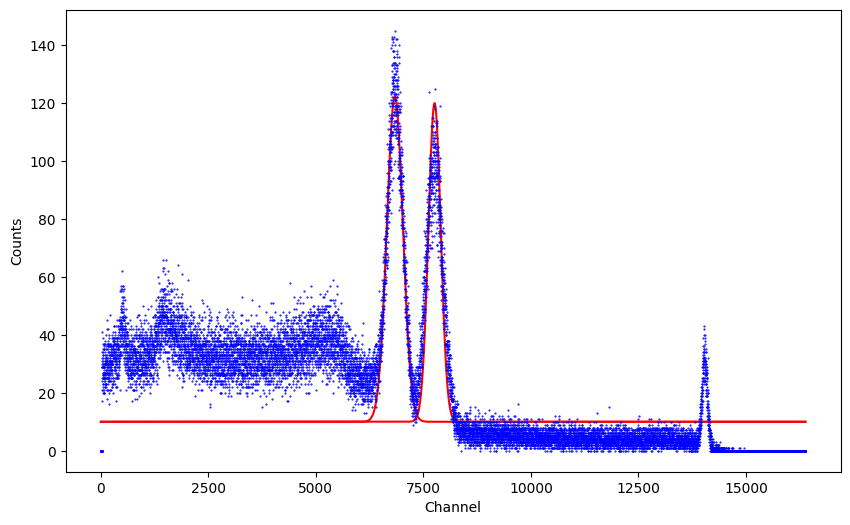

Gp3_data_E1/co60\Co60_30_2_805v.csv
[140, 6800, 175]
[ 114.31857394 6852.7579137   187.69908205]
Centre: 6852.757913700025 +/- 2.4029151133661237
[140, 7800, 250]
[ 110.         7768.33850462  147.8771557 ]
Centre: 7768.338504624979 +/- 2.1913127841546856


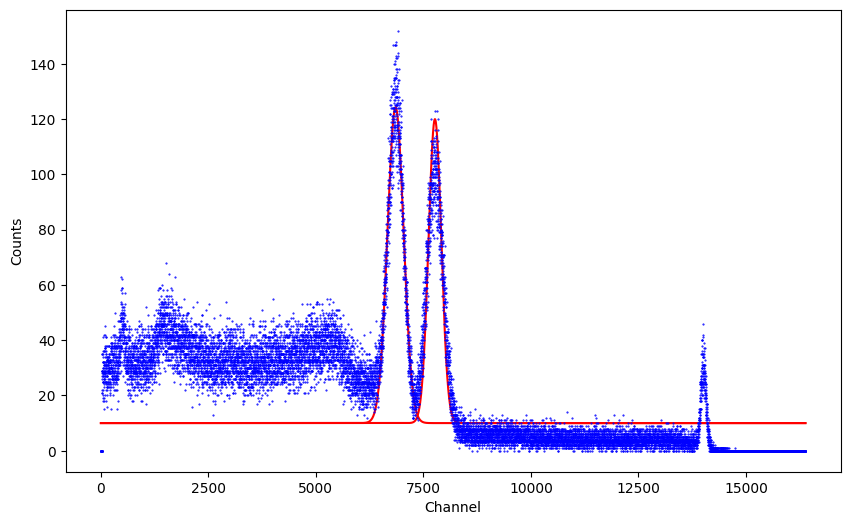

Gp3_data_E1/co60\Co60_30_3_805v.csv
[140, 6800, 175]
[ 114.63638679 6839.65967862  185.33880746]
Centre: 6839.659678619949 +/- 2.087663786897677
[140, 7800, 250]
[ 110.         7758.12536005  147.19805018]
Centre: 7758.125360048478 +/- 2.2196567078388263


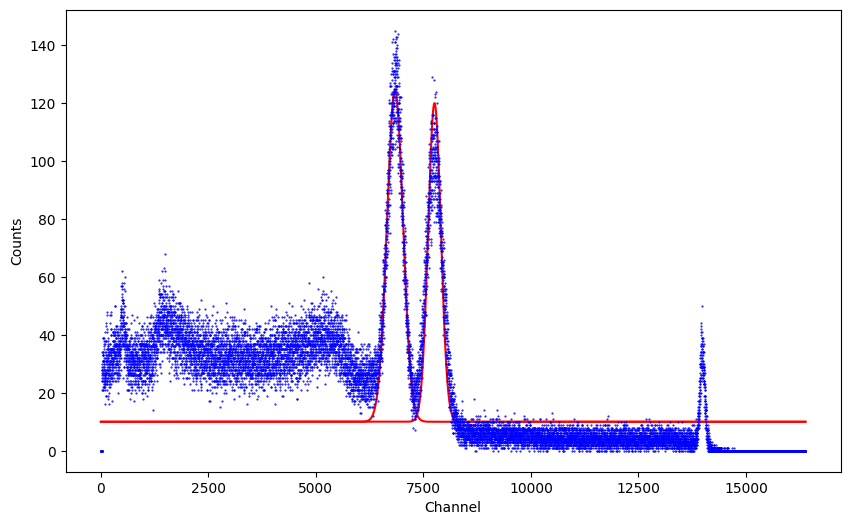

In [87]:
co60files = glob.glob('Gp3_data_E1/co60/*.csv')
with open("co60Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error\n")
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        p0s = [[140, 6800, 175], [140, 7800, 250]]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-30, p0[1]-200, p0[2]-200], [p0[0]+30, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-200:p0[1]+200], data["Counts"].to_numpy()[p0[1]-200:p0[1]+200], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-200:p0[1]+200])
            print(popt)
            centre = popt[1]
            error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
        plt.plot(data["Channel"], data["Counts"],'bo', label=co60file, markersize=0.5)
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")


Gp3_data_E1/na22\Na22_804_1.csv
[3431.75295444 2902.02829827  226.51967754]
Centre: 2902.0282982684594 +/- 1.3630833491400163


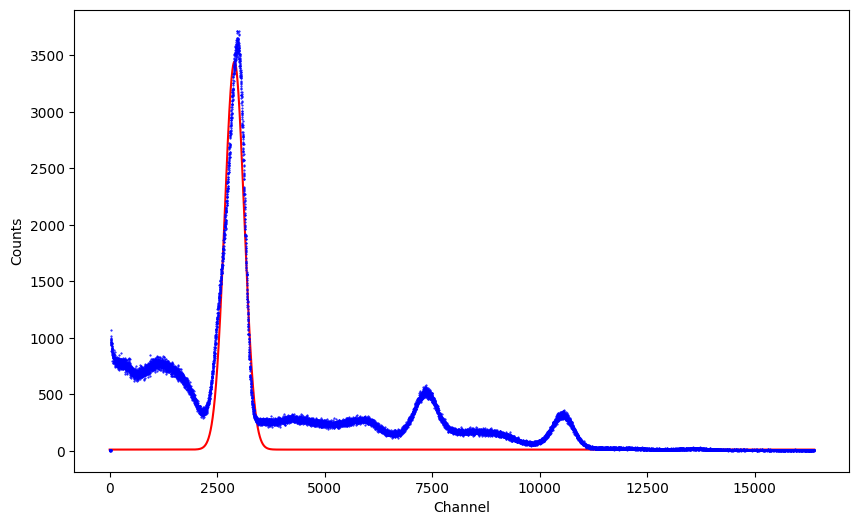

Gp3_data_E1/na22\Na22_804_2.csv
[3429.54151548 2901.8184888   226.74184532]
Centre: 2901.8184888003293 +/- 1.3652595193114359


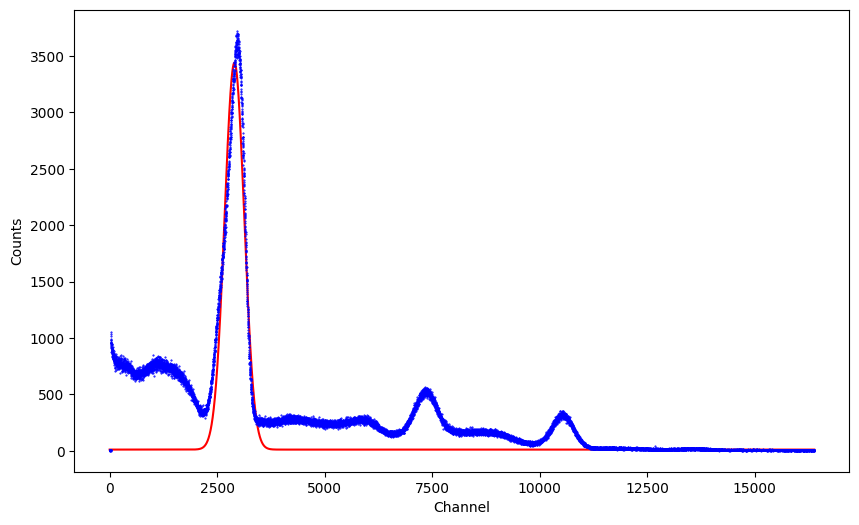

Gp3_data_E1/na22\Na22_804_3.csv
[3446.53686624 2897.13522778  224.19922042]
Centre: 2897.135227783813 +/- 1.3567737846804362


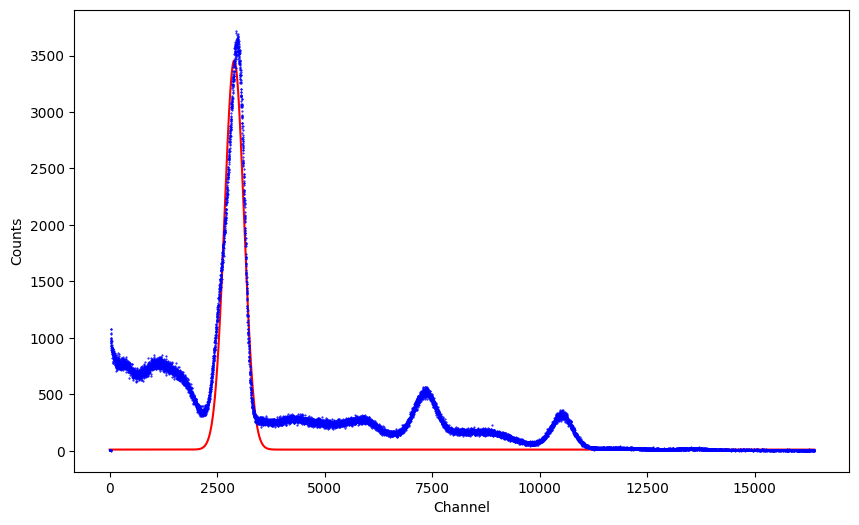

In [89]:
co60files = glob.glob('Gp3_data_E1/na22/*.csv')
with open("na22Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error\n")
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        p0 = [3500, 2900, 300]
        
        
        bounds = [[p0[0]-500, p0[1]-500, p0[2]-200], [p0[0]+500, p0[1]+500, p0[2]+200]]
        popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400])
        print(popt)
        centre = popt[1]
        error = np.sqrt(np.diag(pcov))[1]
        fp.write(f"{centre},{error}\n")
        
        print(f"Centre: {centre} +/- {error}")
        plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
        plt.plot(data["Channel"], data["Counts"],'bo', label=co60file, markersize=0.5)
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")
